<a href="https://colab.research.google.com/github/Sathishk2/Computer-Vision/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  # split into tetsing and training

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

So we've got 60,000 images that are made up of 28x28 pixels (784 in total).

In [ ]:
train_images[0,23,23]  # let's have a look at one pixel

194

In [ ]:
train_labels[:10]  # let's have a look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

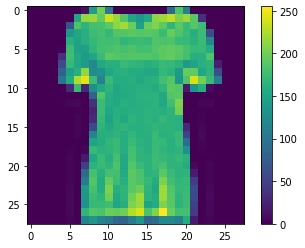

In [ ]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=1)  # we pass the data, labels and epochs and watch the magic! #we change the number of epochs to 1 so that we can increase the accuracy of the testing model

1875/1875 [==============================] - 11s 6ms/step - loss: 0.1822 - accuracy: 0.9316


In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3326 - accuracy: 0.8839
Test accuracy: 0.883899986743927


313/313 [==============================] - 1s 2ms/step
Ankle boot


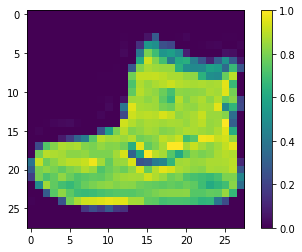

In [ ]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[0])])
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 10
1/1 [==============================] - 0s 29ms/step


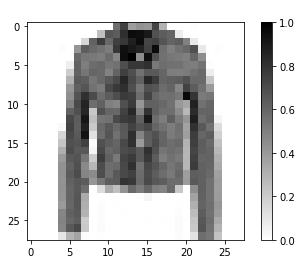

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
